## Notebook for the Mesenchymal Reference Map preparation

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 27th February 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs

In [3]:
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [4]:
%matplotlib inline

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [6]:
# Downloading the data
input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad'
output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_(Gut_cell_atlas+Smilie+Wang)_output.h5ad'

In [7]:
#Anndata upload
anndata = sc.read_h5ad(input)
anndata.X

<375293x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 649526885 stored elements in Compressed Sparse Row format>

### Step 1 - create a proportion graph for cell types

In [8]:
#Rename 'nan' in 'Diagnosis' column to 'healthy'
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('nan', 'Healthy adult')
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('Healthy', 'Healthy adult')

In [9]:
anndata.obs['CellType'].value_counts()

Mesenchymal        155794
Epithelial         129929
Neuronal            17594
T cells             17394
Plasma cells        16445
Endothelial         13082
B cells             11381
Myeloid              9820
Stem Cell            2508
Red blood cells      1346
Name: CellType, dtype: int64

In [10]:
#Filter epithelial cells and stem cells
#Extract Healthy adult and non-inflamed data in anndata_adult object
cells_to_keep = ["Stem Cell", "Mesenchymal"]
Mesenchymal_cells = anndata.obs['CellType'].isin(cells_to_keep)
Mesenchymal_cells = anndata[Mesenchymal_cells, :].copy()


In [11]:
Mesenchymal_cells.obs['Diagnosis'].value_counts()

fetal                146597
Healthy adult          7772
Pediatric healthy      2903
Non-inflamed           1030
Name: Diagnosis, dtype: int64

In [12]:
#Change nan in cell states to Stem Cell
Mesenchymal_cells.obs['Integrated_05'] = anndata.obs['Integrated_05'].replace('nan', 'Stem_Cells_ext')

In [13]:
Mesenchymal_cells.obs['Integrated_05'].value_counts()

Mesoderm 2 (ZEB2+)       34731
Mesoderm 1 (HAND1+)      29399
SMC (PLPP2+)             13156
Stromal 3 (C7+)          12412
Stromal 1 (ADAMDEC1+)    11296
                         ...  
I cells (CCK+)               0
Goblet cell                  0
Glia 3 (BCAN+)               0
Glia 2 (ELN+)                0
β cells (INS+)               0
Name: Integrated_05, Length: 135, dtype: int64

In [14]:
#Filter adult cells
diagnoses_to_keep = ["Non-inflamed", "Healthy adult"]
Mesenchymal_cells_adult = Mesenchymal_cells.obs['Diagnosis'].isin(diagnoses_to_keep)
Mesenchymal_cells_adult = Mesenchymal_cells[Mesenchymal_cells_adult, :].copy()

In [15]:
Mesenchymal_cells_adult.obs['Integrated_05'].value_counts()

Transitional Stromal 3 (C3+)    3636
Stem_Cells_ext                  2508
Contractile pericyte (PLN+)     1028
Stromal 1 (CCL11+)               573
Stromal 2 (NPY+)                 225
Stromal 3 (C7+)                  173
Stromal 1 (ADAMDEC1+)            165
mLN Stroma (FMO2+)               129
myofibroblast                    126
myofibroblast (RSPO2+)           114
T reticular                       53
Pericyte                          45
Mesothelium (PRG4+)               25
Stromal 2 (CH25H+)                 2
Name: Integrated_05, dtype: int64

In [16]:
#Extract only pediatric data
Mesenchymal_cells_pediatric = Mesenchymal_cells[Mesenchymal_cells.obs['Diagnosis'] == 'Pediatric healthy']
#Extract only fetal data
Mesenchymal_cells_fetal = Mesenchymal_cells[Mesenchymal_cells.obs['Diagnosis'] == 'fetal']

In [17]:
Mesenchymal_cells_pediatric.obs['Integrated_05'].value_counts()

Stromal 1 (CCL11+)             1134
Stromal 2 (NPY+)                604
Stromal 1 (ADAMDEC1+)           407
Pericyte                        230
FDC                             177
myofibroblast                   122
T reticular                     105
Stromal 3 (C7+)                  52
Stromal 4 (MMP1+)                20
Contractile pericyte (PLN+)      18
myofibroblast (RSPO2+)           17
mLTo                             16
Stromal 2 (CH25H+)                1
Name: Integrated_05, dtype: int64

In [18]:
Mesenchymal_cells_fetal.obs['Integrated_05'].value_counts()

Mesoderm 2 (ZEB2+)             34731
Mesoderm 1 (HAND1+)            29399
SMC (PLPP2+)                   13156
Stromal 3 (C7+)                12187
Stromal 1 (ADAMDEC1+)          10724
cycling stromal                 8751
Stromal 2 (NPY+)                5886
SMC (PART1/CAPN3+)              5714
Stromal 2 (CH25H+)              5605
myofibroblast (RSPO2+)          5503
Immature pericyte               4511
Stromal 3 (KCNN3+)              4402
Contractile pericyte (PLN+)     1588
ICC                             1404
Mesothelium                     1036
angiogenic pericyte              994
Mesothelium (RGS5+)              869
mLTo                             107
Stromal 1 (CCL11+)                21
Germ                               9
Name: Integrated_05, dtype: int64

In [19]:
#Concatenate the adult, pediatric and fetal data
Mesenchymal_cells = ad.concat([Mesenchymal_cells_adult, Mesenchymal_cells_pediatric, Mesenchymal_cells_fetal])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Mesoderm 2 (ZEB2+)'),
  Text(1, 0, 'Mesoderm 1 (HAND1+)'),
  Text(2, 0, 'SMC (PLPP2+)'),
  Text(3, 0, 'Stromal 3 (C7+)'),
  Text(4, 0, 'Stromal 1 (ADAMDEC1+)'),
  Text(5, 0, 'cycling stromal'),
  Text(6, 0, 'Stromal 2 (NPY+)'),
  Text(7, 0, 'SMC (PART1/CAPN3+)'),
  Text(8, 0, 'myofibroblast (RSPO2+)'),
  Text(9, 0, 'Stromal 2 (CH25H+)'),
  Text(10, 0, 'Immature pericyte'),
  Text(11, 0, 'Stromal 3 (KCNN3+)'),
  Text(12, 0, 'Transitional Stromal 3 (C3+)'),
  Text(13, 0, 'Contractile pericyte (PLN+)'),
  Text(14, 0, 'Stem_Cells_ext'),
  Text(15, 0, 'Stromal 1 (CCL11+)'),
  Text(16, 0, 'ICC'),
  Text(17, 0, 'Mesothelium'),
  Text(18, 0, 'angiogenic pericyte'),
  Text(19, 0, 'Mesothelium (RGS5+)'),
  Text(20, 0, 'Pericyte'),
  Text(21, 0, 'myofibroblast'),
  Text(22, 0, 'FDC'),
  Text(23, 0, 'T reticular'),
  Text

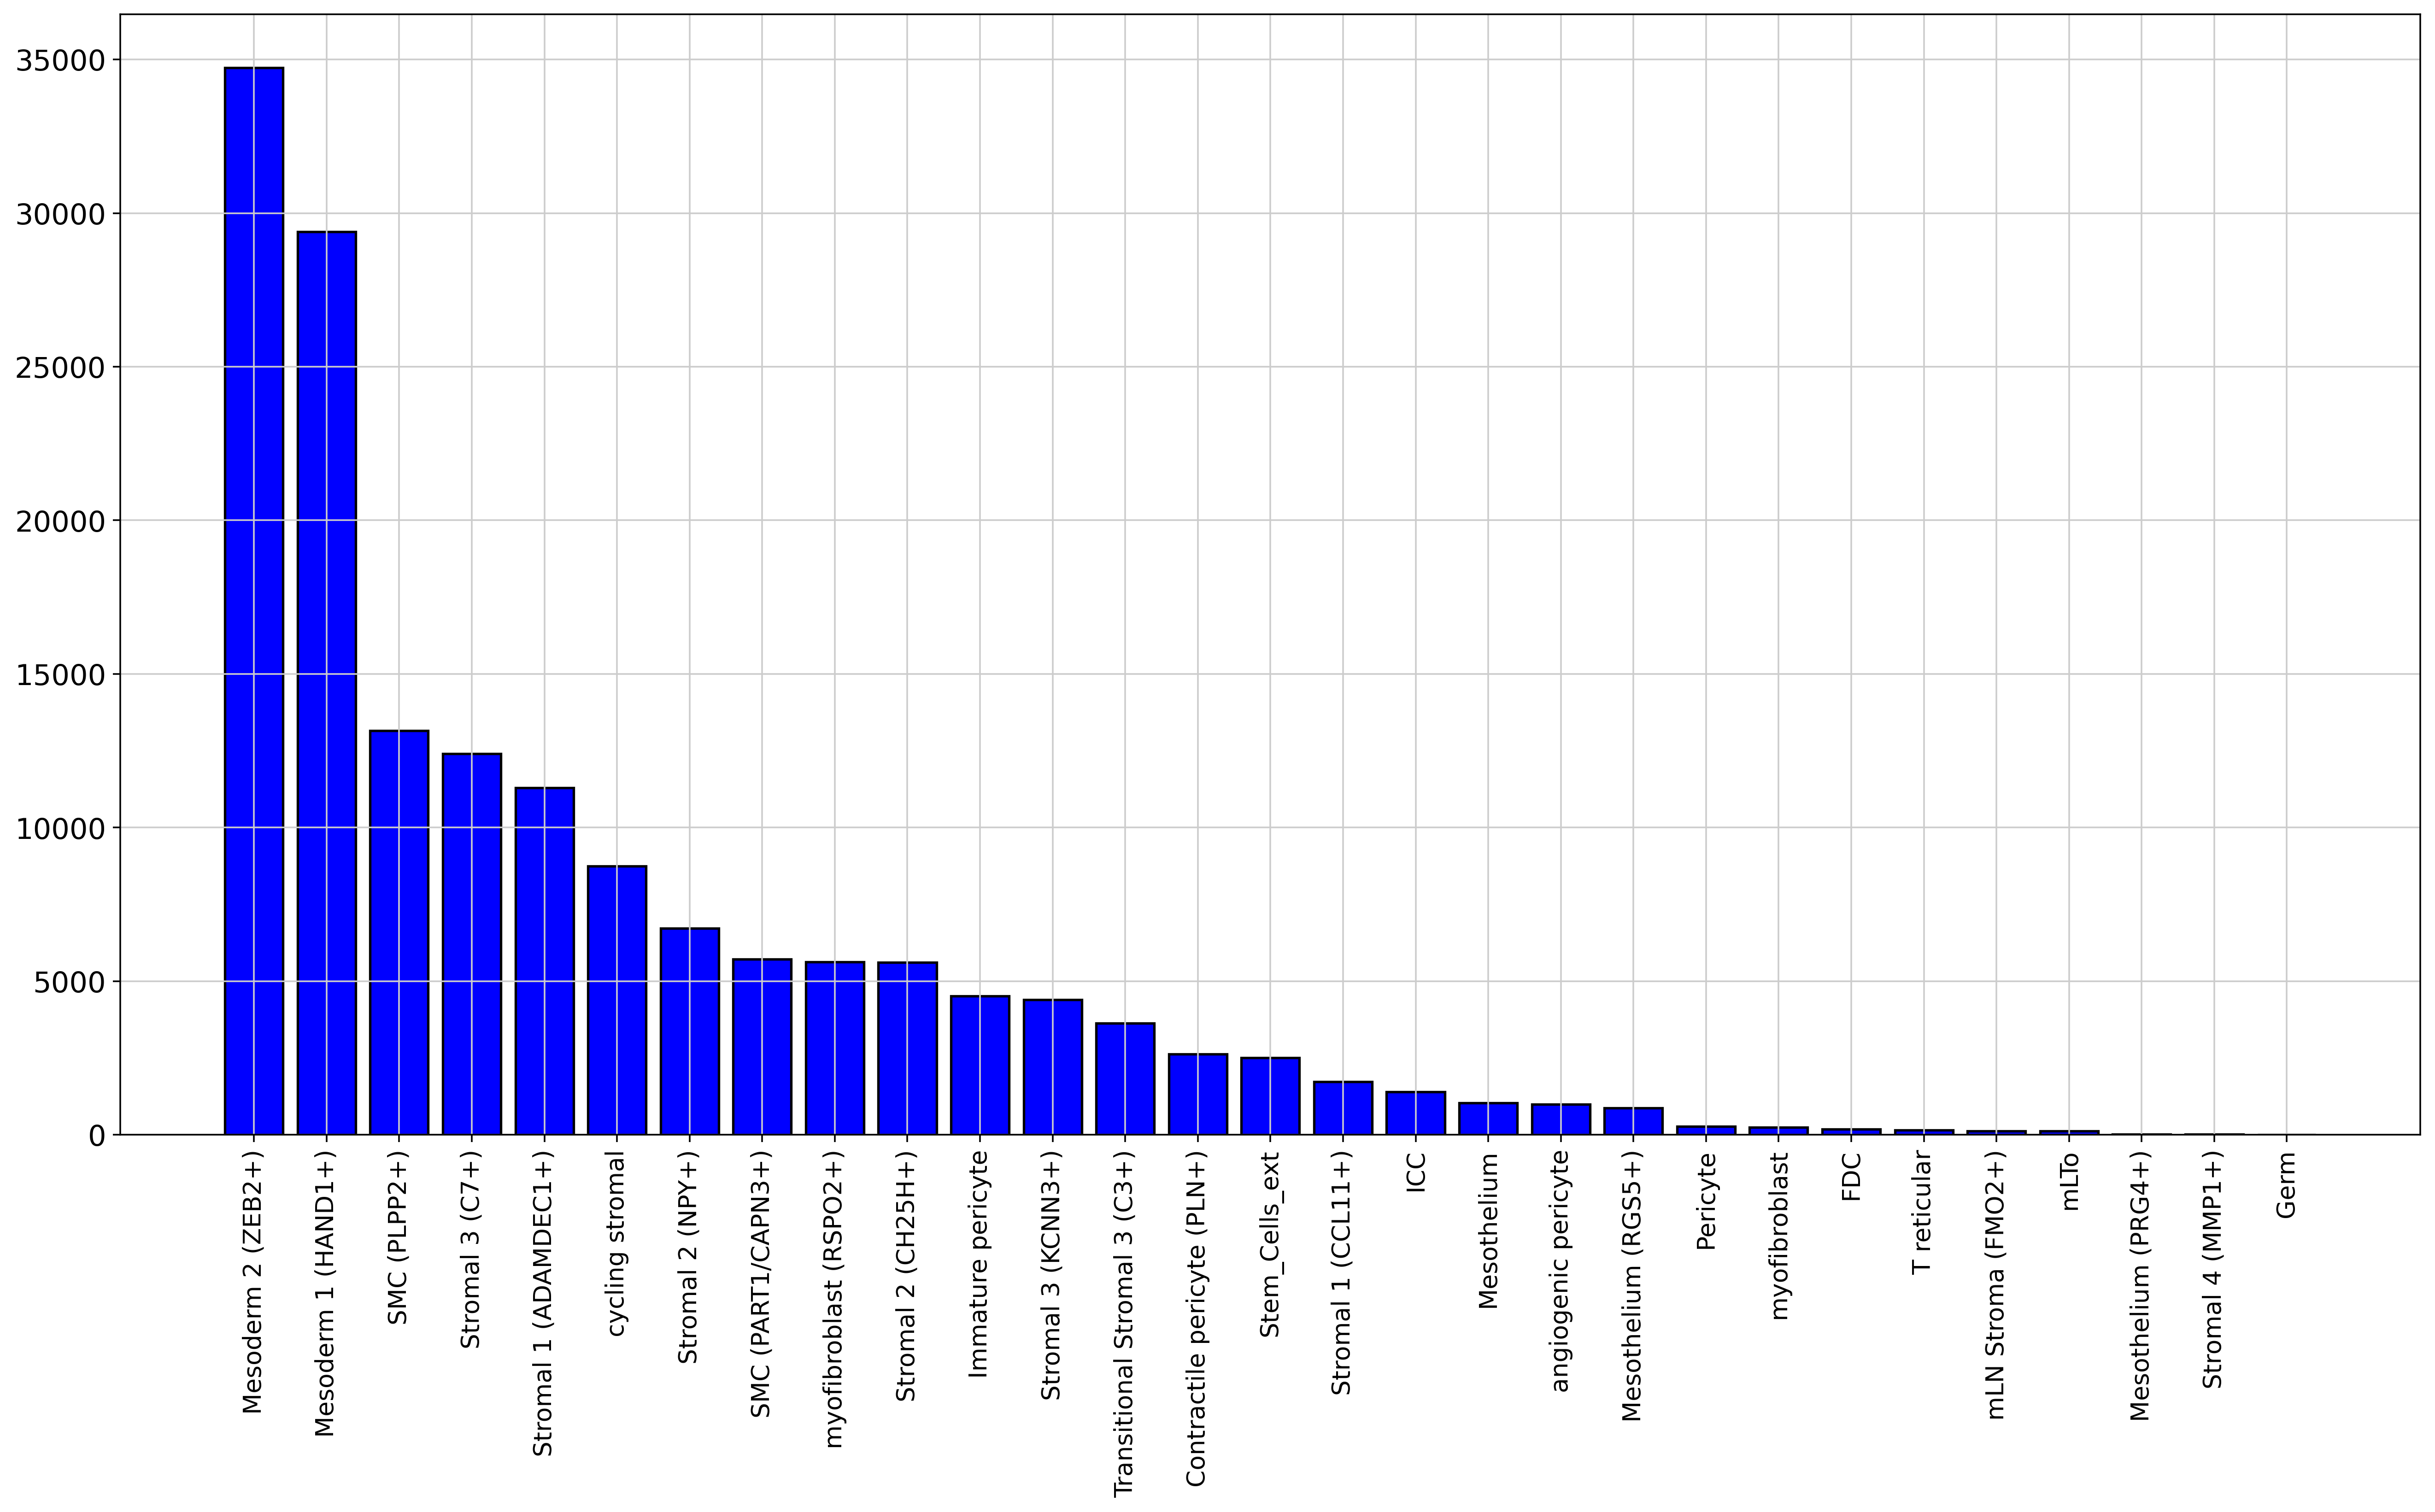

In [20]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Mesenchymal_cells.obs["Integrated_05"].value_counts().index, Mesenchymal_cells.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [21]:
#Delete Germ cells 
Mesenchymal_cells = Mesenchymal_cells[~Mesenchymal_cells.obs['Integrated_05'].isin(['Germ']), :]

In [22]:
Mesenchymal_cells.obs['Integrated_05'].value_counts()

Mesoderm 2 (ZEB2+)              34731
Mesoderm 1 (HAND1+)             29399
SMC (PLPP2+)                    13156
Stromal 3 (C7+)                 12412
Stromal 1 (ADAMDEC1+)           11296
cycling stromal                  8751
Stromal 2 (NPY+)                 6715
SMC (PART1/CAPN3+)               5714
myofibroblast (RSPO2+)           5634
Stromal 2 (CH25H+)               5608
Immature pericyte                4511
Stromal 3 (KCNN3+)               4402
Transitional Stromal 3 (C3+)     3636
Contractile pericyte (PLN+)      2634
Stem_Cells_ext                   2508
Stromal 1 (CCL11+)               1728
ICC                              1404
Mesothelium                      1036
angiogenic pericyte               994
Mesothelium (RGS5+)               869
Pericyte                          275
myofibroblast                     248
FDC                               177
T reticular                       158
mLN Stroma (FMO2+)                129
mLTo                              123
Mesothelium 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Mesoderm 2 (ZEB2+)'),
  Text(1, 0, 'Mesoderm 1 (HAND1+)'),
  Text(2, 0, 'SMC (PLPP2+)'),
  Text(3, 0, 'Stromal 3 (C7+)'),
  Text(4, 0, 'Stromal 1 (ADAMDEC1+)'),
  Text(5, 0, 'cycling stromal'),
  Text(6, 0, 'Stromal 2 (NPY+)'),
  Text(7, 0, 'SMC (PART1/CAPN3+)'),
  Text(8, 0, 'myofibroblast (RSPO2+)'),
  Text(9, 0, 'Stromal 2 (CH25H+)'),
  Text(10, 0, 'Immature pericyte'),
  Text(11, 0, 'Stromal 3 (KCNN3+)'),
  Text(12, 0, 'Transitional Stromal 3 (C3+)'),
  Text(13, 0, 'Contractile pericyte (PLN+)'),
  Text(14, 0, 'Stem_Cells_ext'),
  Text(15, 0, 'Stromal 1 (CCL11+)'),
  Text(16, 0, 'ICC'),
  Text(17, 0, 'Mesothelium'),
  Text(18, 0, 'angiogenic pericyte'),
  Text(19, 0, 'Mesothelium (RGS5+)'),
  Text(20, 0, 'Pericyte'),
  Text(21, 0, 'myofibroblast'),
  Text(22, 0, 'FDC'),
  Text(23, 0, 'T reticular'),
  Text(24, 0

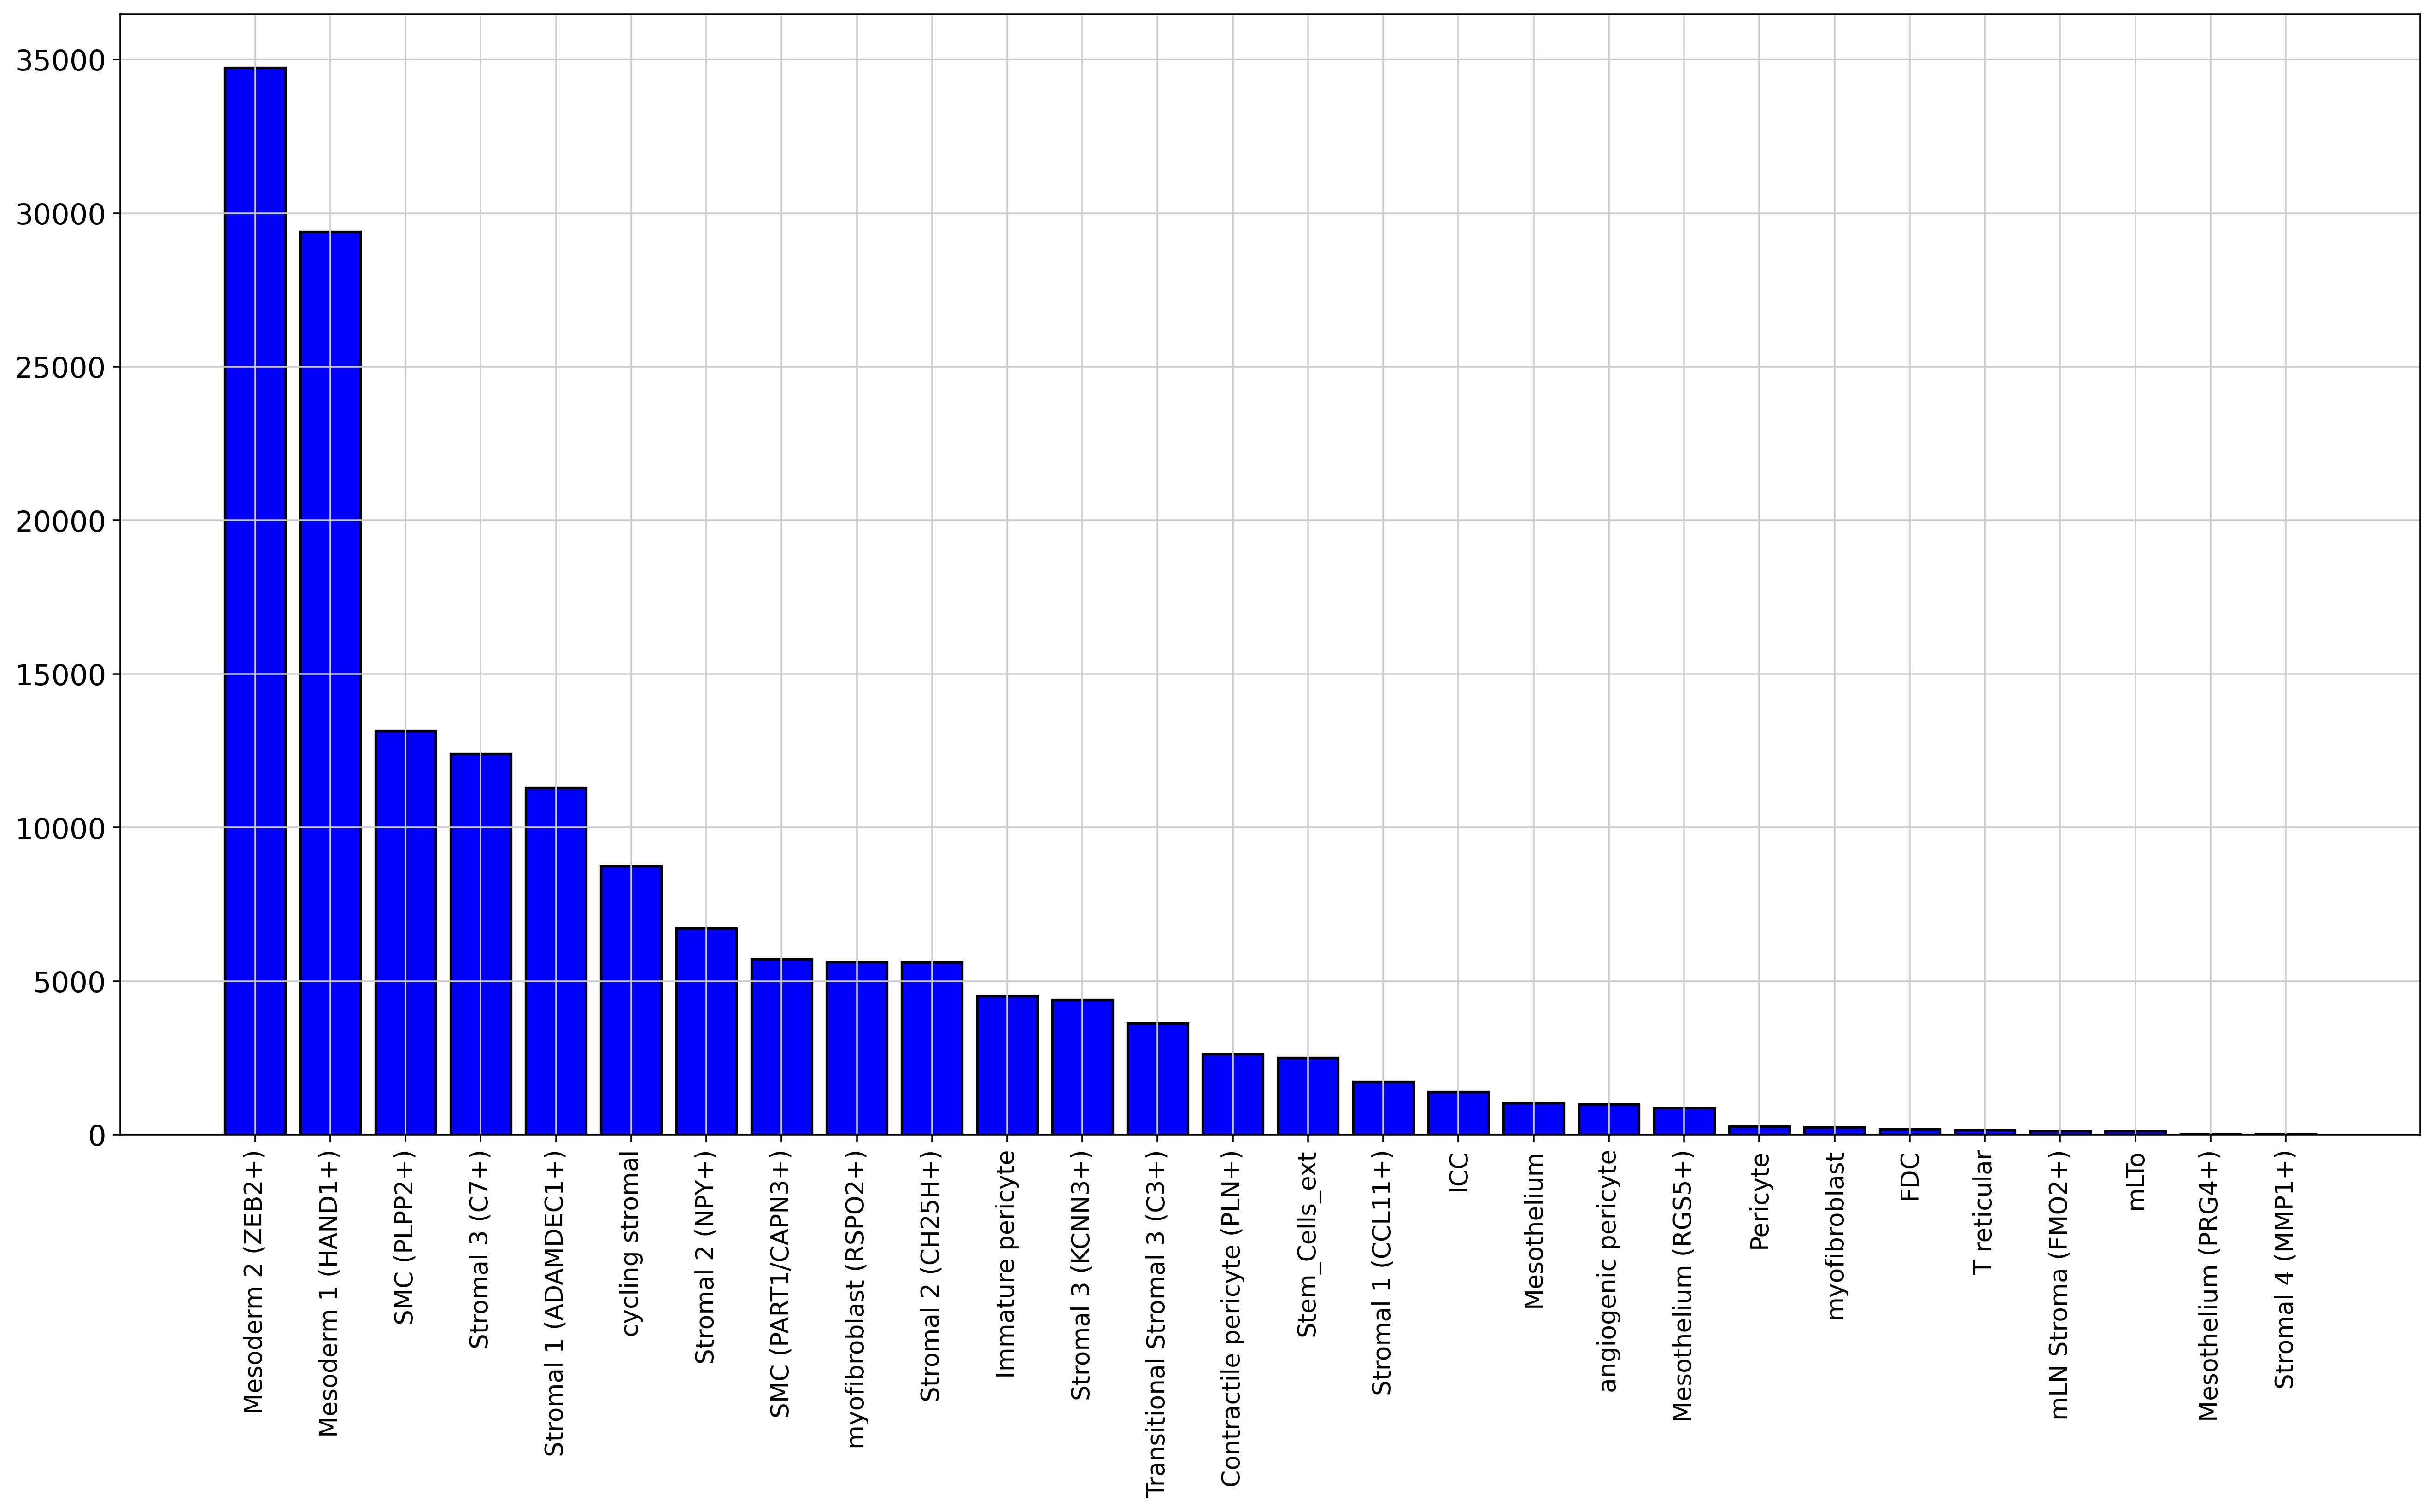

In [23]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Mesenchymal_cells.obs["Integrated_05"].value_counts().index, Mesenchymal_cells.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

### Subset data with `geosketch`

In [24]:
#Extract epithelial and plasma cells from the anndata_adult object
Mesoderm_2_ZEB2 = Mesenchymal_cells[Mesenchymal_cells.obs["Integrated_05"].isin(['Mesoderm 2 (ZEB2+)']), :]
Mesoderm_1_HAND1 = Mesenchymal_cells[Mesenchymal_cells.obs["Integrated_05"].isin(['Mesoderm 1 (HAND1+)']), :]
SMC_PLPP2 = Mesenchymal_cells[Mesenchymal_cells.obs["Integrated_05"].isin(['SMC (PLPP2+)']), :]
Stromal_3_C7 = Mesenchymal_cells[Mesenchymal_cells.obs["Integrated_05"].isin(['Stromal 3 (C7+)']), :]
Stromal_1_ADAMDEC1 = Mesenchymal_cells[Mesenchymal_cells.obs["Integrated_05"].isin(['Stromal 1 (ADAMDEC1+)']), :]

In [25]:
sc.pp.pca(Mesoderm_2_ZEB2)
sc.pp.pca(Mesoderm_1_HAND1)
sc.pp.pca(SMC_PLPP2)
sc.pp.pca(Stromal_3_C7)
sc.pp.pca(Stromal_1_ADAMDEC1)

computing PCA
    with n_comps=50
    finished (0:00:52)
computing PCA
    with n_comps=50
    finished (0:00:50)
computing PCA
    with n_comps=50
    finished (0:00:28)
computing PCA
    with n_comps=50
    finished (0:00:25)
computing PCA
    with n_comps=50
    finished (0:00:26)


In [26]:
N = 10000

In [27]:
sketch_index_Mesoderm_2_ZEB2 = gs(Mesoderm_2_ZEB2.obsm['X_pca'], N, replace = False)
sketch_index_Mesoderm_1_HAND1 = gs(Mesoderm_1_HAND1.obsm['X_pca'], N, replace = False)
sketch_index_SMC_PLPP2 = gs(SMC_PLPP2.obsm['X_pca'], N, replace = False)
sketch_index_Stromal_3_C7 = gs(Stromal_3_C7.obsm['X_pca'], N, replace = False)
sketch_index_Stromal_1_ADAMDEC1 = gs(Stromal_1_ADAMDEC1.obsm['X_pca'], N, replace = False)

In [28]:
#Subset cells according to the sketch index
subset_Mesoderm_2_ZEB2 = Mesoderm_2_ZEB2[Mesoderm_2_ZEB2.obs_names[sketch_index_Mesoderm_2_ZEB2]]
subset_Mesoderm_1_HAND1 = Mesoderm_1_HAND1[Mesoderm_1_HAND1.obs_names[sketch_index_Mesoderm_1_HAND1]]
subset_SMC_PLPP2 = SMC_PLPP2[SMC_PLPP2.obs_names[sketch_index_SMC_PLPP2]]
subset_Stromal_3_C7 = Stromal_3_C7[Stromal_3_C7.obs_names[sketch_index_Stromal_3_C7]]
subset_Stromal_1_ADAMDEC1 = Stromal_1_ADAMDEC1[Stromal_1_ADAMDEC1.obs_names[sketch_index_Stromal_1_ADAMDEC1]]

In [29]:
# Drop Mesoderm_2_ZEB2, Mesoderm_1_HAND1, SMC_PLPP2, Stromal_3_C7 and Stromal_1_ADAMDEC1 from the anndata_adult object
Mesenchymal_cells_subset = Mesenchymal_cells[~Mesenchymal_cells.obs['Integrated_05'].isin(['Mesoderm 2 (ZEB2+)', 'Mesoderm 1 (HAND1+)', 'SMC (PLPP2+)', 'Stromal 3 (C7+)', 'Stromal 1 (ADAMDEC1+)']), :]

In [30]:
# Concatenate the subset of Mesoderm_2_ZEB2, Mesoderm_1_HAND1, SMC_PLPP2, Stromal_3_C7 and Stromal_1_ADAMDEC1 with the Mesenchymal_cells_subset
Mesenchymal_cells_subset = ad.concat([Mesenchymal_cells_subset, subset_Mesoderm_2_ZEB2, subset_Mesoderm_1_HAND1, subset_SMC_PLPP2, subset_Stromal_3_C7, subset_Stromal_1_ADAMDEC1])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Stromal 1 (ADAMDEC1+)'),
  Text(1, 0, 'Stromal 3 (C7+)'),
  Text(2, 0, 'SMC (PLPP2+)'),
  Text(3, 0, 'Mesoderm 1 (HAND1+)'),
  Text(4, 0, 'Mesoderm 2 (ZEB2+)'),
  Text(5, 0, 'cycling stromal'),
  Text(6, 0, 'Stromal 2 (NPY+)'),
  Text(7, 0, 'SMC (PART1/CAPN3+)'),
  Text(8, 0, 'myofibroblast (RSPO2+)'),
  Text(9, 0, 'Stromal 2 (CH25H+)'),
  Text(10, 0, 'Immature pericyte'),
  Text(11, 0, 'Stromal 3 (KCNN3+)'),
  Text(12, 0, 'Transitional Stromal 3 (C3+)'),
  Text(13, 0, 'Contractile pericyte (PLN+)'),
  Text(14, 0, 'Stem_Cells_ext'),
  Text(15, 0, 'Stromal 1 (CCL11+)'),
  Text(16, 0, 'ICC'),
  Text(17, 0, 'Mesothelium'),
  Text(18, 0, 'angiogenic pericyte'),
  Text(19, 0, 'Mesothelium (RGS5+)'),
  Text(20, 0, 'Pericyte'),
  Text(21, 0, 'myofibroblast'),
  Text(22, 0, 'FDC'),
  Text(23, 0, 'T reticular'),
  Text(24, 0

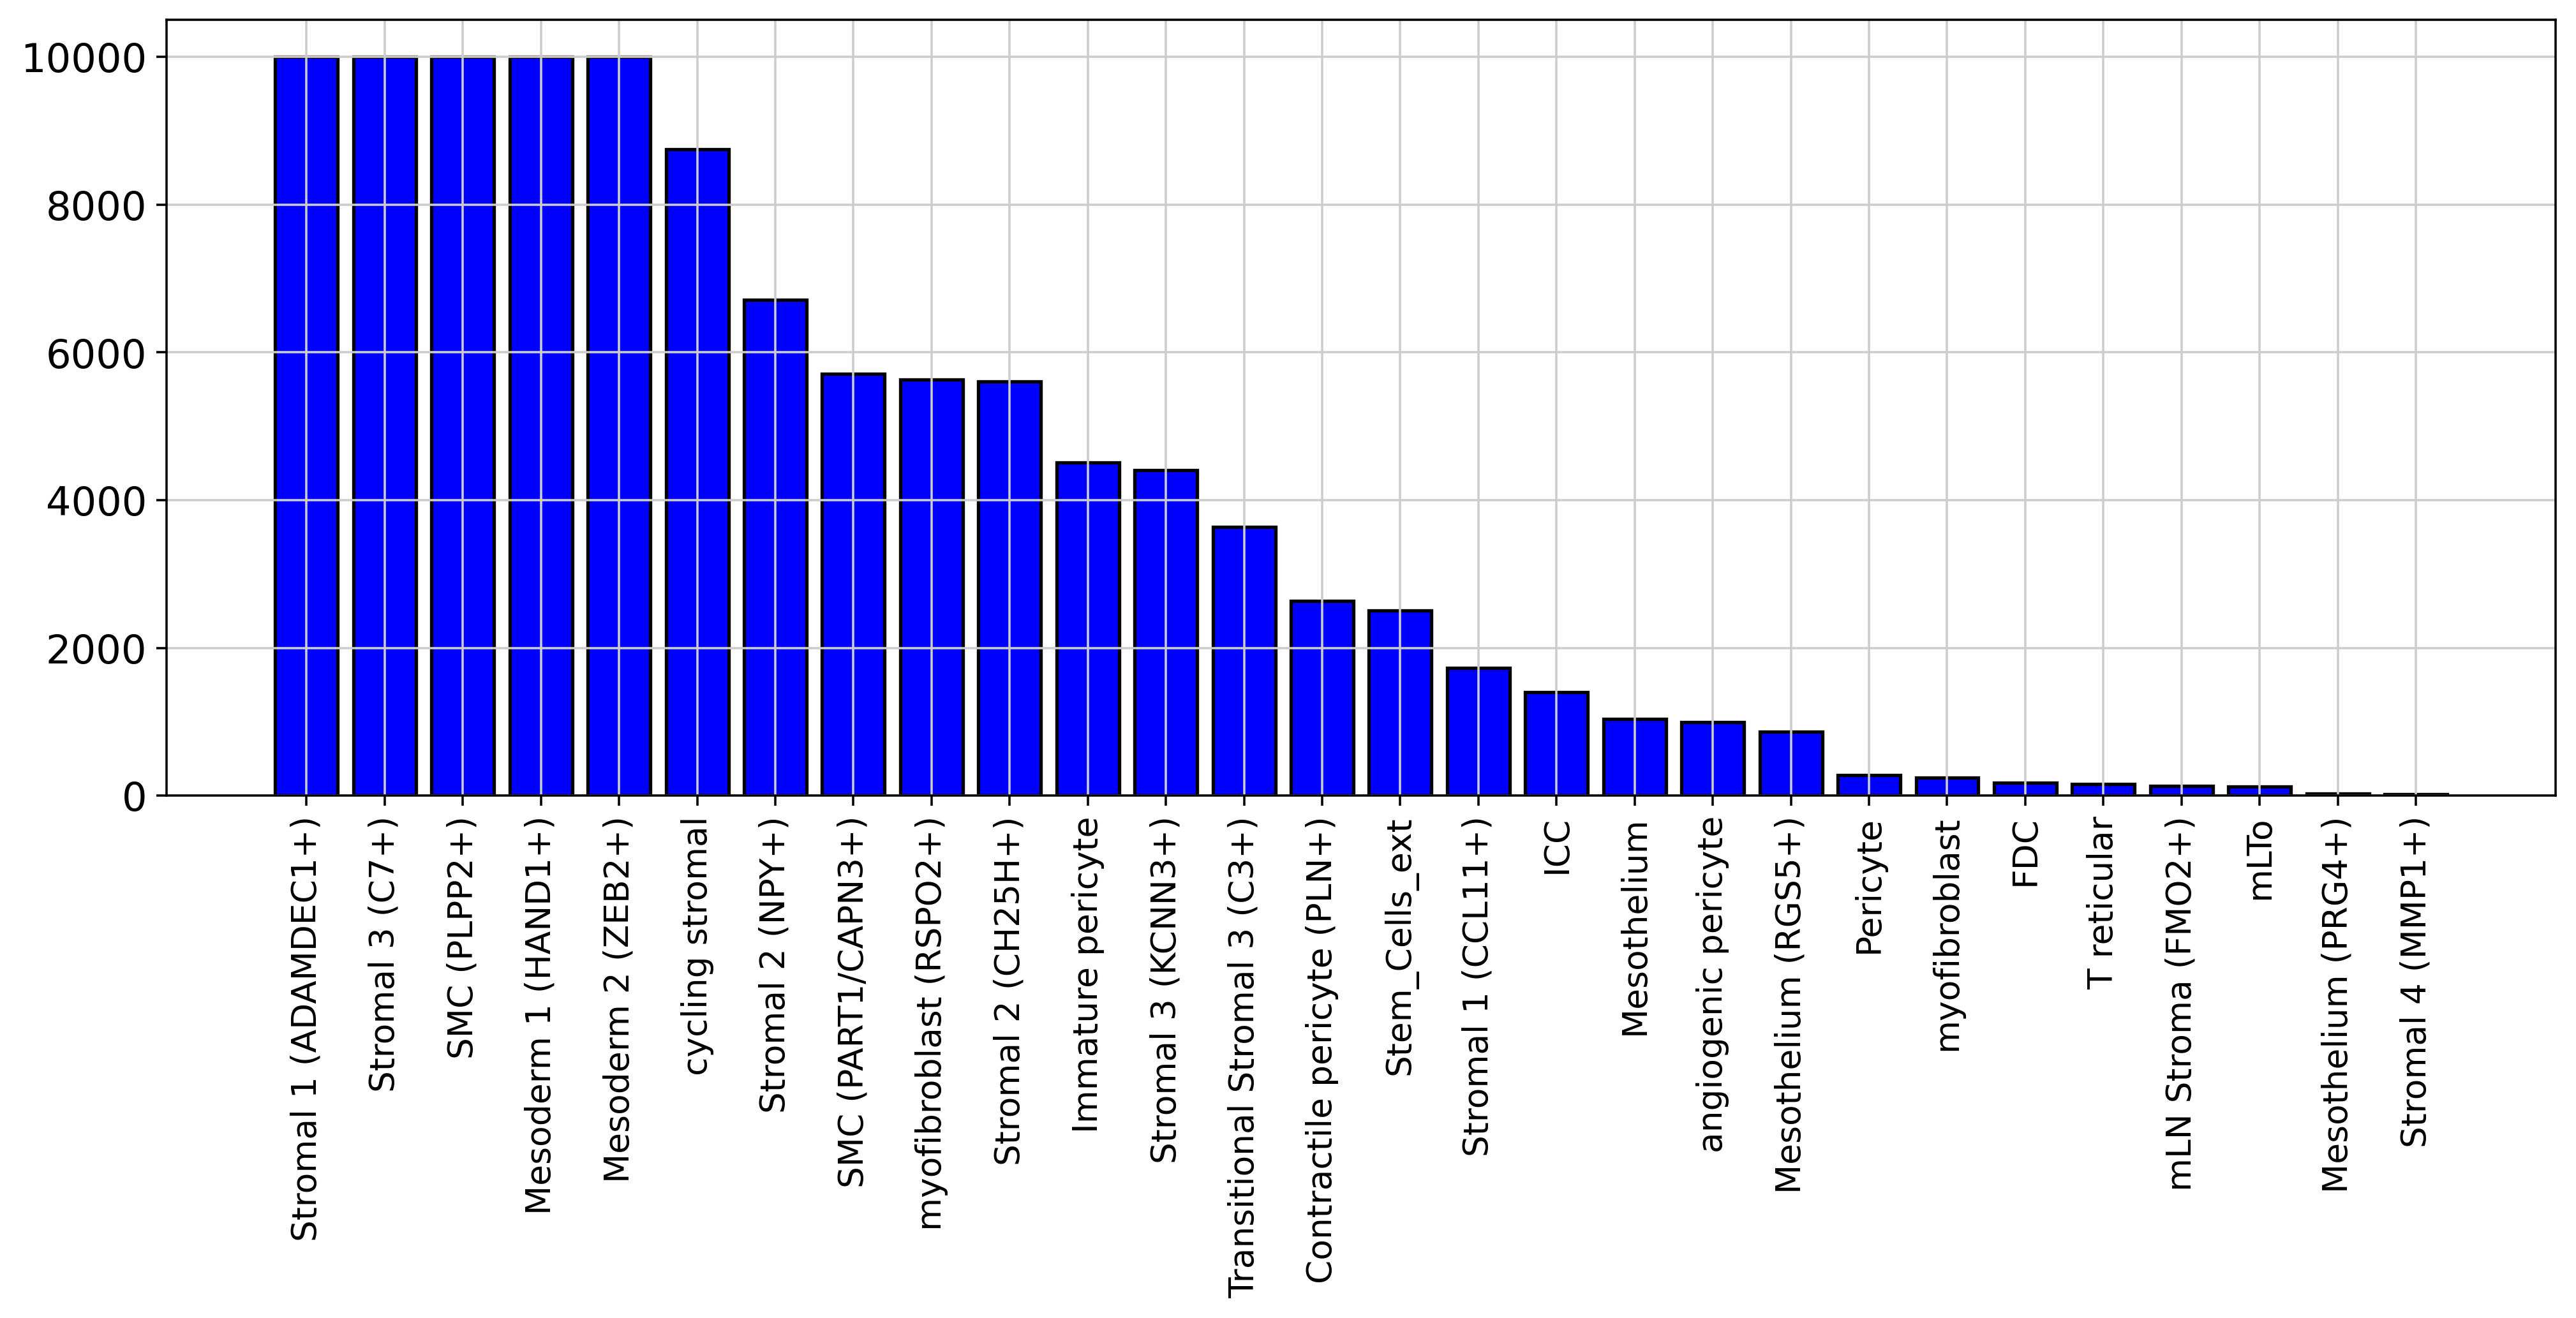

In [31]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(Mesenchymal_cells_subset.obs["Integrated_05"].value_counts().index, Mesenchymal_cells_subset.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [32]:
#Save the anndata_subset object
Mesenchymal_cells_subset.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Mesenchymal_reference_map_subset_after_geosketch2.h5ad')

In [33]:
#Drop the anndata_subset object from the anndata object 
query_object = Mesenchymal_cells[~Mesenchymal_cells.obs_names.isin(Mesenchymal_cells_subset.obs_names), :]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mesoderm 2 (ZEB2+)'),
  Text(1, 0, 'Mesoderm 1 (HAND1+)'),
  Text(2, 0, 'SMC (PLPP2+)'),
  Text(3, 0, 'Stromal 3 (C7+)'),
  Text(4, 0, 'Stromal 1 (ADAMDEC1+)')])

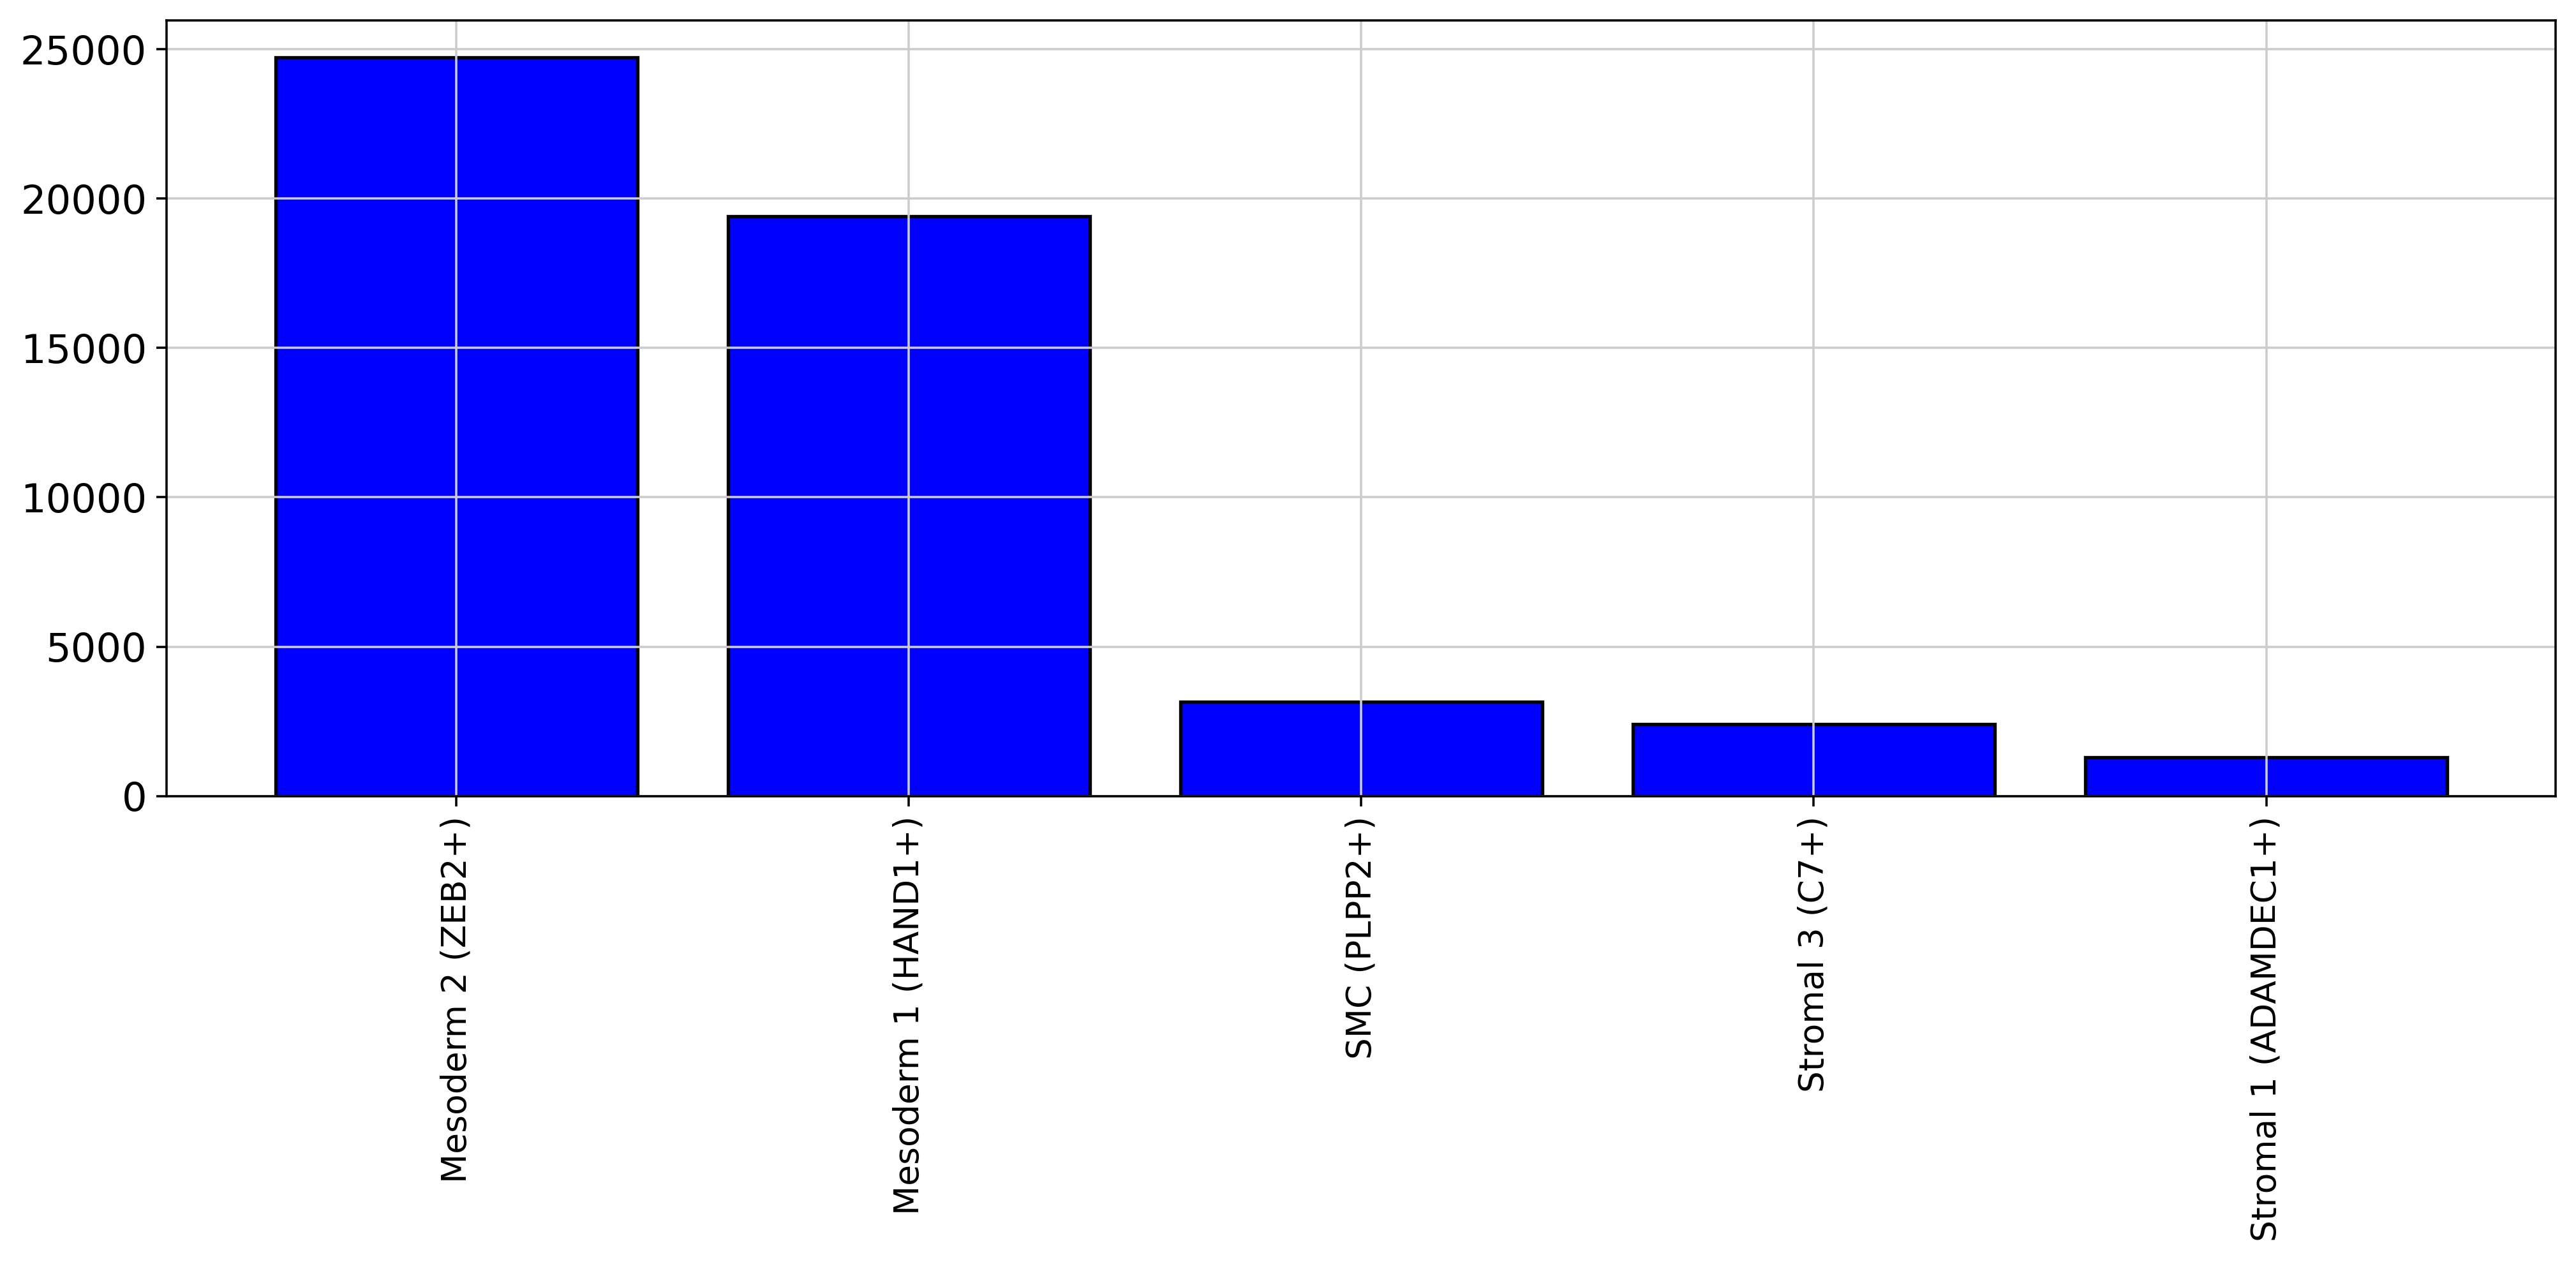

In [34]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(query_object.obs["Integrated_05"].value_counts().index, query_object.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [35]:
#Save the query_object object
query_object.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Mesenchymal_query_map_after_geosketch2.h5ad')

/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_co